In [1]:
import numpy as np

def spectral_gradient_projection_method(F, grad_F, x0, projection, max_iter=100000, tol=1e-5, rho=0.9, sigma=0.0001):
    xk = x0
    gk = grad_F(xk)
    dk = -gk  # Initial search direction

    for k in range(max_iter):
        if k > 0:
            # Spectral parameter using the Barzilai-Borwein method oof
            sk = xk - x_prev
            yk = gk - gk_prev
            beta_k = np.dot(sk, yk) / (np.dot(yk, yk) + 1e-10)  # Added to avoid div by 0
            dk = -gk + beta_k * dk_prev  # Update search direction using spectral parameter

        # Line search
        lambda_k = 1
        while np.linalg.norm(F(xk + lambda_k * dk)) > np.linalg.norm(F(xk)) + sigma * lambda_k * np.dot(gk, dk):
            lambda_k *= rho
            if lambda_k < 1e-8:  # Avoiding small step sizes cause it won't get to solution quick then
                print("Warning: Step size too small.")
                break

        x_next = xk + lambda_k * dk
        x_next = projection(x_next)  # Projecting onto the feasible set

        if np.linalg.norm(x_next - xk) < tol:  # Convergence check
            return x_next, True, k + 1

        # Update for next iteration
        x_prev = xk
        xk = x_next
        gk_prev = gk
        gk = grad_F(xk)
        dk_prev = dk

    return xk, False, max_iter  # Max iterations reached without convergence

# Projection function
def projection(x):
    return x  # No projection applied

# Rosenbrock function
def F(x):
    a = 1
    b = 100
    return np.array([b * (x[1] - x[0]**2)**2 + (a - x[0])**2])

# Gradient of the Rosenbrock function
def grad_F(x):
    a = 1
    b = 100
    return np.array([-2 * (a - x[0]) - 4 * b * x[0] * (x[1] - x[0]**2), 2 * b * (x[1] - x[0]**2)])

x0 = np.array([-1.2, 1.0])  # Initial guess for Rosenbrock function

solution, success, num_iter = spectral_gradient_projection_method(F, grad_F, x0, projection)
if success:
    print(f"Solution found: {solution} in {num_iter} iterations")
else:
    print("Solution not found within the maximum number of iterations")


Solution found: [1.00014303 1.00029784] in 12209 iterations


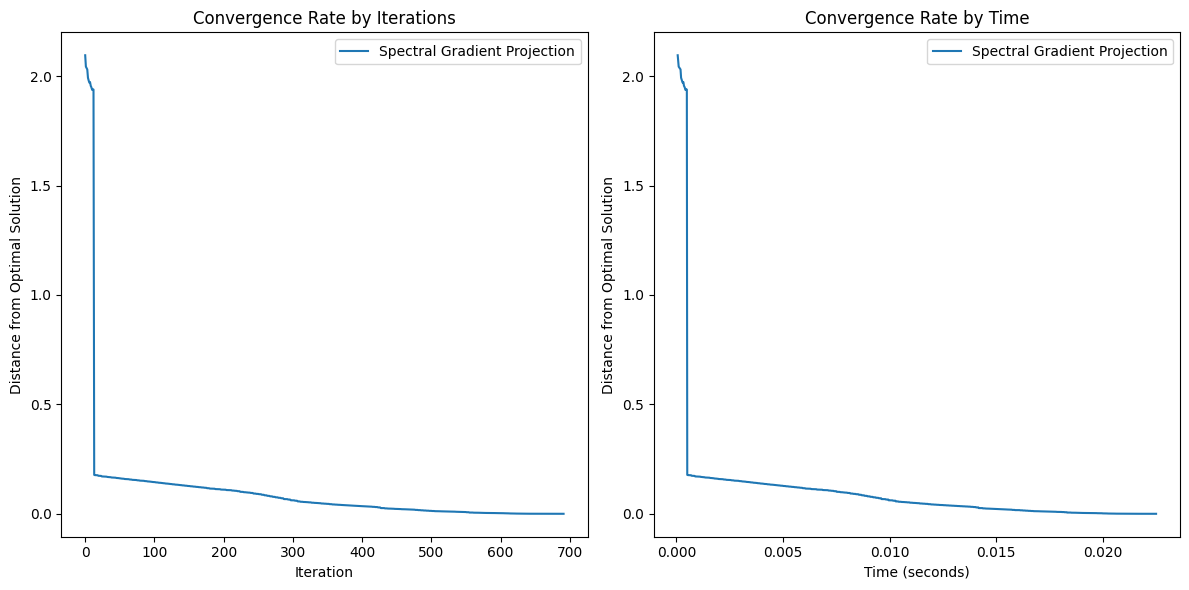

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time


def rosenbrock_function(x):
    a = 1
    b = 100
    return (a - x[0]) ** 2 + b * (x[1] - x[0] ** 2) ** 2


def rosenbrock_gradient(x):
    a = 1
    b = 100
    grad_x = -2 * (a - x[0]) - 4 * b * x[0] * (x[1] - x[0] ** 2)
    grad_y = 2 * b * (x[1] - x[0] ** 2)
    if np.any(np.isnan([grad_x, grad_y])) or np.any(np.isinf([grad_x, grad_y])):
        return np.array([np.nan, np.nan])
    return np.array([grad_x, grad_y])


def projection(x):
    #cause Rosenbrock function is unconstrained and doesn't need projection
    return x


def backtracking_line_search(x, dk, gk, F, grad_F, alpha=0.5, beta=0.5):
    t = 1
    while F(x + t * dk) > F(x) + alpha * t * np.dot(gk, dk):
        t *= beta
    return t


def spectral_gradient_projection_method(F, grad_F, x0, projection, max_iter=10000, tol=1e-5, rho=0.9, sigma=0.0001):
    xk = x0
    gk = grad_F(xk)
    dk = -gk
    distances = []
    times = []

    start_time = time.time()

    for k in range(max_iter):
        lambda_k = backtracking_line_search(xk, dk, gk, F, grad_F)

        x_next = xk + lambda_k * dk
        x_next = projection(x_next)

        distances.append(np.linalg.norm(x_next - np.array([1, 1])))
        times.append(time.time() - start_time)

        if np.linalg.norm(gk) < tol:
            break

        gk_next = grad_F(x_next)
        if k > 0:
            sk = x_next - xk
            yk = gk_next - gk
            # Added epsilon to avoid division by zero
            beta_k = np.dot(sk, yk) / (np.dot(yk, yk) + 1e-10)
            dk = -gk_next + beta_k * dk

        xk = x_next
        gk = gk_next

    return xk, distances, times


F = rosenbrock_function
grad_F = rosenbrock_gradient
x0 = np.array([-1.2, 1.0])  # Initial guess
projection = projection

solution, distances, times = spectral_gradient_projection_method(F, grad_F, x0, projection)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(distances, label='Spectral Gradient Projection')
plt.xlabel('Iteration')
plt.ylabel('Distance from Optimal Solution')
plt.title('Convergence Rate by Iterations')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(times, distances, label='Spectral Gradient Projection')
plt.xlabel('Time (seconds)')
plt.ylabel('Distance from Optimal Solution')
plt.title('Convergence Rate by Time')
plt.legend()

plt.tight_layout()
plt.show()
